In [1]:
import pandas as pd

In [2]:
call_logs = pd.read_csv("call_logs.csv")

In [3]:
call_logs.shape

(8144, 18)

In [4]:
call_logs.head()

,call_date,call_key,inbound,queued,assigned,abandon,in_sl,short_call,transferred,answered,during_chat,black_list,ivr_duration,wait_duration,ring_duration,hold_duration,talk_duration,csat_score
0,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,1,True,False,False,106,5,5,NaN,157.0,5
1,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,1,True,False,False,107,10,10,NaN,113.0,5
2,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,1,True,False,False,117,26,5,NaN,121.0,5
3,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,0,True,False,False,120,18,17,415.0,1314.0,5
4,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,0,True,False,False,98,6,6,NaN,212.0,5


In [5]:
call_evaluations = pd.read_csv("evaluation_logs.csv")

In [6]:
call_evaluations.shape

(167, 2)

In [7]:
call_evaluations = call_evaluations.groupby('call_key', as_index=False).mean()
call_evaluations

,call_key,evaluation_score
0,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgI...,100.0
1,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgI...,92.0
2,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgI...,100.0
3,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgI...,97.5
4,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgI...,80.5
...,...,...
156,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgO...,70.0
157,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgP...,93.0
158,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgP...,87.0
159,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgP...,81.0


In [8]:
data = pd.merge(call_logs, call_evaluations, on='call_key', how='left')

In [9]:
data['evaluation_score'].isnull().sum().sum()

7986

In [10]:
data.shape

(8144, 19)

In [11]:
data.head()

,call_date,call_key,inbound,queued,assigned,abandon,in_sl,short_call,transferred,answered,during_chat,black_list,ivr_duration,wait_duration,ring_duration,hold_duration,talk_duration,csat_score,evaluation_score
0,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,1,True,False,False,106,5,5,NaN,157.0,5,NaN
1,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,1,True,False,False,107,10,10,NaN,113.0,5,NaN
2,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,1,True,False,False,117,26,5,NaN,121.0,5,NaN
3,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,0,True,False,False,120,18,17,415.0,1314.0,5,NaN
4,2020-11-25,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgM...,True,True,True,False,True,False,0,True,False,False,98,6,6,NaN,212.0,5,NaN


In [12]:
missing_percent = data['hold_duration'].isnull().mean()
missing_percent

0.5504666011787819

In [13]:
data['hold_duration'] = data['hold_duration'].fillna(data['hold_duration'].mean()).astype(int)

In [14]:
min_evaluation_score = data['evaluation_score'].min(axis=0, skipna=True)
min_evaluation_score

30.0

In [15]:
finish = pd.to_datetime(data['call_date'].max(), format='%Y-%m-%d', errors='raise')

In [16]:
start = pd.to_datetime(data['call_date'].min(), format='%Y-%m-%d', errors='raise')

In [17]:
timediff = finish - start
timediff.days + 1

1230

In [18]:
data.during_chat.value_counts()

False    5688
Name: during_chat, dtype: int64

In [19]:
data.short_call.value_counts()

False    8144
Name: short_call, dtype: int64

In [20]:
data.black_list.value_counts()

False    8144
Name: black_list, dtype: int64

In [21]:
data.queued.value_counts()

True    8144
Name: queued, dtype: int64

In [22]:
data.drop(['during_chat', 'short_call', 'black_list', 'queued'], axis=1, inplace=True)

In [23]:
data['in_sl'].fillna(value=False, inplace=True)

In [24]:
data.isnull().sum().sum()

7994

In [25]:
data[data["talk_duration"].isnull()]

,call_date,call_key,inbound,assigned,abandon,in_sl,transferred,answered,ivr_duration,wait_duration,ring_duration,hold_duration,talk_duration,csat_score,evaluation_score
5001,2017-09-22,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgK...,True,False,True,False,0,False,419,280,0,76,NaN,1,NaN
5042,2018-09-01,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgO...,True,True,True,False,0,False,193,122,0,299,NaN,1,NaN
5136,2017-12-22,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgK...,True,True,True,False,0,False,950,883,0,299,NaN,1,NaN
5253,2018-08-26,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgO...,True,True,True,False,0,False,1041,975,0,299,NaN,1,NaN
5254,2018-08-26,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgO...,True,True,True,False,0,False,394,324,0,299,NaN,1,NaN
5364,2017-11-07,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgK...,True,True,True,False,0,False,118,45,0,299,NaN,1,NaN
5410,2018-03-05,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgO...,True,True,True,False,0,False,238,168,0,299,NaN,1,NaN
5768,2018-08-15,ahRzfm11c3RlcmktaGl6bWV0bGVyaXIRCxIEQ2FsbBiAgO...,True,True,True,False,0,False,472,410,0,299,NaN,1,NaN


In [26]:
data['talk_duration'] = data['talk_duration'].fillna(0).astype(int)

In [27]:
data.drop(['call_date', 'call_key'], axis=1, inplace=True)

In [28]:
grouped = data['evaluation_score'].groupby(data['evaluation_score'])
data_evaluation = grouped.count()
data_evaluation

evaluation_score
30.00      1
42.00      1
49.00      1
55.00      1
60.00      1
65.00      2
69.50      1
70.00      3
73.00      1
74.00      1
77.00      1
77.50      1
80.00      2
80.50      4
81.00      2
82.00      1
82.50      1
84.00      1
85.00      3
87.00      5
88.50      4
89.25      1
91.00      4
91.50      1
92.00      2
92.50      1
93.00      1
93.50      7
94.00      1
95.00      9
95.50      1
97.00      4
97.50     11
98.00      4
98.50      1
99.00      1
100.00    71
Name: evaluation_score, dtype: int64

In [29]:
evaluated_data_count = data[data['evaluation_score']>0].shape[0]
evaluated_data_count

158

In [30]:
from sklearn.utils import shuffle
data = shuffle(data)

In [31]:
data.reset_index(drop=True, inplace=True)

In [32]:
data.head(15)

,inbound,assigned,abandon,in_sl,transferred,answered,ivr_duration,wait_duration,ring_duration,hold_duration,talk_duration,csat_score,evaluation_score
0,True,True,False,True,1,True,141,6,5,299,100,5,NaN
1,True,True,False,False,0,True,408,337,3,299,97,1,NaN
2,True,True,False,False,0,True,154,115,7,393,428,1,NaN
3,True,True,False,True,0,True,90,12,12,299,222,5,NaN
4,True,True,False,True,0,True,89,11,11,299,74,4,NaN
5,True,True,False,True,0,True,70,7,6,299,256,5,NaN
6,True,True,False,True,0,True,91,6,6,299,104,5,NaN
7,True,True,False,True,0,True,79,5,5,317,467,5,NaN
8,True,True,False,True,0,True,69,21,6,299,1920,2,NaN
9,True,True,False,True,0,True,69,9,9,299,106,5,NaN


In [33]:
import matplotlib.pyplot as plt

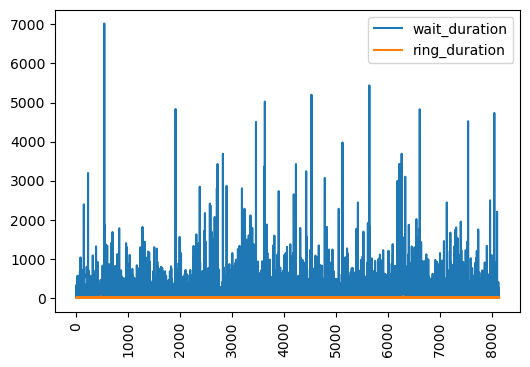

In [34]:
plt.figure(dpi=100)
plt.plot(data["wait_duration"])
plt.plot(data["ring_duration"])

plt.legend(["wait_duration", "ring_duration"])
plt.xticks(rotation='vertical')

plt.show()

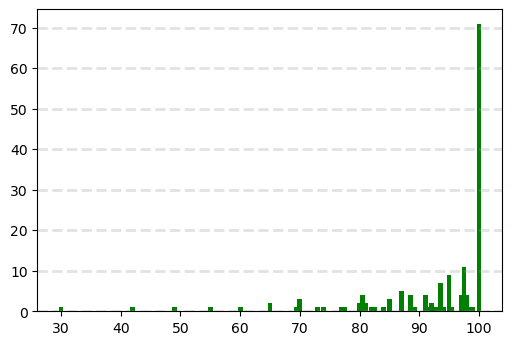

In [35]:
plt.figure(dpi=100)

plt.bar(data_evaluation.index, data_evaluation, color='green')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.3)

plt.show()

In [36]:
missing_percent = data.isnull().mean()
drop_cols = list(data.columns[missing_percent > 0.1])
drop_cols

['evaluation_score']

In [37]:
data.drop(drop_cols, axis=1, inplace=True)

In [38]:
score_data = data.csat_score.value_counts()
score_data

5    4430
1    2305
4     815
3     365
2     229
Name: csat_score, dtype: int64

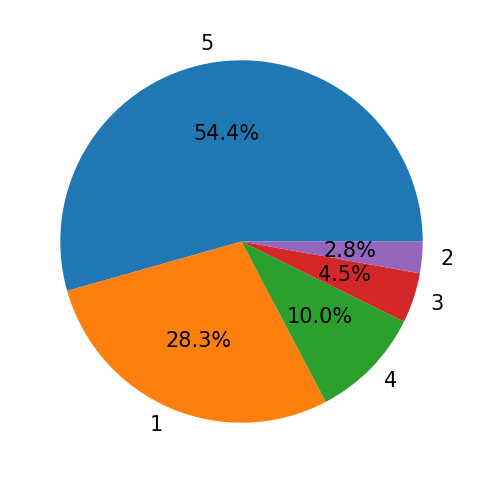

In [39]:
plt.figure(dpi=150)

plt.pie(score_data, labels= score_data.index, autopct='%0.1f%%')
#plt.legend()

plt.show()

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
X = data.drop("csat_score", axis = 1)
y = data["csat_score"]

In [42]:
from sklearn.svm import SVC

svm= SVC(kernel="rbf")
scores = cross_val_score(svm,X,y,cv = 10)

results = pd.DataFrame({"Score Mean":scores.mean(),"Score Std":scores.std()},
                       index = ["Support Vector Machine"])
results

,Score Mean,Score Std
Support Vector Machine,0.7123,0.011993


In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy")
scores = cross_val_score(dtc,X,y,cv = 10)

results_dtc = pd.DataFrame({"Score Mean":scores.mean(),"Score Std":scores.std()},
                       index = ["Decision Tree"])
results = results.append(results_dtc)
results

,Score Mean,Score Std
Support Vector Machine,0.712300,0.011993
Decision Tree,0.598225,0.018489


In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, criterion="entropy")
scores = cross_val_score(rfc,X,y,cv = 10)

results_rfc = pd.DataFrame({"Score Mean":scores.mean(),"Score Std":scores.std()},
                       index = ["Random Forest"])
results = results.append(results_rfc)
results

,Score Mean,Score Std
Support Vector Machine,0.712300,0.011993
Decision Tree,0.598225,0.018489
Random Forest,0.693638,0.013560


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)
scores = cross_val_score(knn,X,y,cv = 10)

results_knn = pd.DataFrame({"Score Mean":scores.mean(),"Score Std":scores.std()},
                       index = ["K-Neighbors"])
results = results.append(results_knn)
results

,Score Mean,Score Std
Support Vector Machine,0.712300,0.011993
Decision Tree,0.598225,0.018489
Random Forest,0.693638,0.013560
K-Neighbors,0.711440,0.013181
